# Лабораторная работа №1 “Линейная регрессия”


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) Загрузите набор данных ex1data1.txt из текстового файла.


In [4]:
def load_data1():
    df = pd.read_csv('data/ex1data1.txt',  header=None, names = ["population", "profit"])
    return df['population'], df['profit']

x_train, y_train = load_data1()

## 2) Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

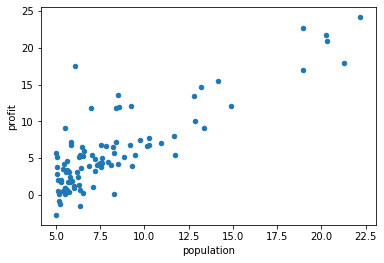

In [4]:
ax1 = df.plot.scatter(x='population', y='profit')

## 3) Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

In [5]:
def cost_func(x, y, theta):
    j = 0
    count = len(y)
    for i in range(count):
        h = theta[0] + theta[1] * x[i]
        j += (h - y[i])**2

    return j / (2 * count)

## 4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.


In [6]:
def f(x, y, theta):
    return theta[0] + x * theta[1] - y
    
def gradient_descent(x, y, theta, a, iter_count):
    training_logs = []
    for i in range(iter_count):
        dj_dt0, dj_dt1 = 0, 0
        count = len(x)
        for j in range(len(x)):
            h = f(x[j], y[j], theta)
            dj_dt0 += h
            dj_dt1 += x[j] * h
        dj_dt0 /= count
        dj_dt1 /= count
        theta[0] -= a * dj_dt0
        theta[1] -= a * dj_dt1
        
        curr_cost = cost_func(x, y, theta)
        training_logs.append([i, curr_cost, theta[0], theta[1]])
    
    return theta, training_logs

In [7]:
theta, logs =  gradient_descent(
    x = df['population'], y = df['profit'],
    theta=[0,0],
    a=0.01,
    iter_count=1000
)

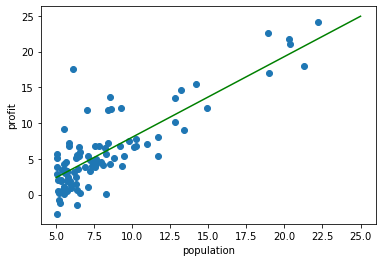

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['population'], df['profit'])
ax.set_xlabel('population')
ax.set_ylabel('profit')
x = np.linspace(5, 25, 3)
ax.plot(x, theta[0] + theta[1]*x, 'g')

In [9]:
theta

[-3.241402144274422, 1.1272942024281842]

## 5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

In [10]:
logs_df = pd.DataFrame(logs, columns=['iter', 'loss', 'theta0', 'theta1'])
data = logs_df[logs_df['theta1'] > 1]
X, Y = np.meshgrid(data['theta0'], data['theta1'])
Z = np.zeros((data['theta0'].size, data['theta1'].size))

for i, theta0 in enumerate(data['theta0']):
    for j, theta1 in enumerate(data['theta1']):
        Z[i, j] = cost_func(x_train, y_train, [theta0, theta1])

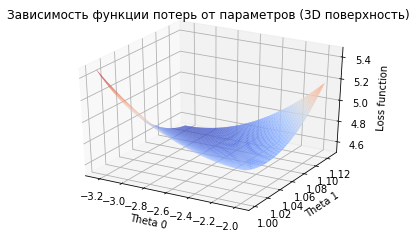

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)
ax.set_title('Зависимость функции потерь от параметров (3D поверхность)')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss function')
plt.show()

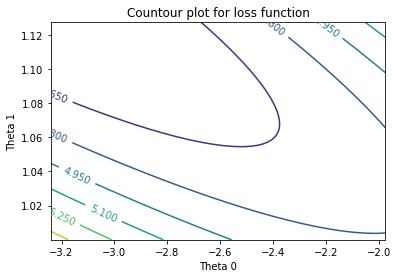

In [12]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, cmap='viridis')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Countour plot for loss function')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
plt.show()

## 6. Загрузите набор данных ex1data2.txt из текстового файла

In [12]:
def load_data2():
    df = pd.read_csv('data/ex1data2.txt',  header=None, names = ["area", "rooms_count", "price"])
    return df.filter(['area', 'rooms_count']), df['price']
x_train, y_train = load_data2()

## 7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.


In [6]:
def normalize_features(X):
    N = X.shape[1]
    copy_X = X.copy()
    for i in range(N):
        feature = X[:, i]
        mean = np.mean(feature)
        delta = np.max(feature) - np.min(feature)            
        copy_X[:, i] -= mean
        copy_X[:, i] /= delta
    return copy_X

In [7]:
def cost_func_vectorized(x, y, theta):
    m = len(x)
    j = (x * theta.T - y).T * (x * theta.T - y)
    return j/(2 * m)

In [8]:
def gradient_descent_vectorized(x, y, theta, a, iter_count):
    m = x.shape[0]
    logs = []

    for iter_num in range(iter_count):
        summ = np.subtract(x * theta.T, y).T * x
        theta = np.subtract(theta, summ*a/m)

        loss = cost_func_vectorized(x, y, theta).item((0, 0))
        logs.append([iter_num, loss])

    return theta, logs

In [9]:
def train_dfs_to_mat(x_train, y_train):
    x_train_matrix = np.mat(x_train)
    y_train_matrix = np.mat(y_train).T
    return x_train_matrix.astype('float64'), y_train_matrix.astype('float64')

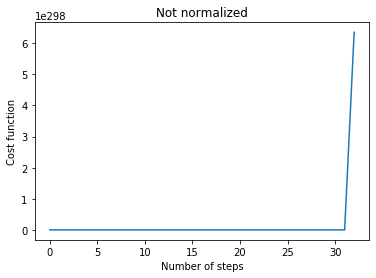

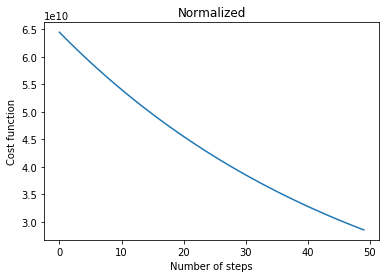

In [74]:
x_train_matrix, y_train_matrix = train_dfs_to_mat(x_train, y_train)
# добавляем 1 как нулевую фичу(для удобства перемножения x и theta)
x_train_matrix = np.column_stack((np.ones(x_train_matrix.shape[0]), x_train_matrix))
theta, logs = gradient_descent_vectorized(
    x_train_matrix, y_train_matrix,
    theta=np.matrix([0,0,0]),
    a=0.005,
    iter_count=50
)
logs_df = pd.DataFrame(logs, columns=['iter', 'current_cost'])

x_train_matrix, y_train_matrix = train_dfs_to_mat(x_train, y_train)
x_train_normalized = normalize_features(x_train_matrix)
# добавляем 1 как нулевую фичу(для удобства перемножения x и theta)
x_train_normalized = np.column_stack((np.ones(x_train_normalized.shape[0]), x_train_normalized))
theta, logs = gradient_descent_vectorized(
    x_train_normalized, y_train_matrix,
    theta=np.matrix([0,0,0]),
    a=0.01,
    iter_count=50
)
logs_df_normalized = pd.DataFrame(logs, columns=['iter', 'current_cost'])

fig, ax1 = plt.subplots()

ax1.plot(logs_df['iter'], logs_df['current_cost'])
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Cost function')
ax1.set_title('Not normalized')

fig2, ax2 = plt.subplots()         
ax2.plot(logs_df_normalized['iter'], logs_df_normalized['current_cost'])
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Cost function')
ax2.set_title('Normalized')
plt.show()

## 8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

Функции были реализованы в пункте 7: cost_func_vectorized, gradient_descent_vectorized

## 9. Покажите, что векторизация дает прирост производительности.
Загрузим еще раз данные из первого файла. Реализованная ранее функция градиентного спуска работает только для случая одномерной линейной регрессии. Поэтому протестируем производительность на первом примере.

In [5]:
x_train, y_train = load_data1()

In [40]:
import time
start_time = time.time()

theta, logs =  gradient_descent(
    x=x_train, y=y_train,
    theta=[0,0],
    a=0.01,
    iter_count=1000
)

runtime = time.time() - start_time

In [41]:
runtime

3.8987977504730225

In [42]:
x_mat, y_mat = train_dfs_to_mat(x_train, y_train)
x_mat = x_mat.T
x_mat = np.column_stack((np.ones(x_mat.shape[0]), x_mat))

start_time = time.time()
theta, logs = gradient_descent_vectorized(
    x=x_mat, y=y_mat,
    theta=np.matrix([0,0]),
    a=0.01,
    iter_count=1000
)
runtime_vector = time.time() - start_time

In [43]:
runtime_vector

0.0784602165222168

In [45]:
runtime / runtime_vector

49.691396777741986

На наших небольших данных мы видим, что прирост в производительности составляет 50 раз. Если фичей и размер обучающей выборки будет больше, то мы бы получили еще большую разницу во времени.

## 10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.


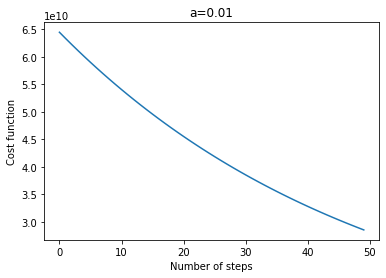

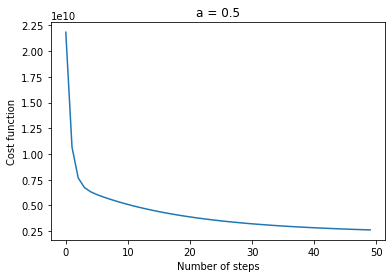

In [13]:
x_train, y_train = load_data2()

def fit(x_train, y_train, a=0.01):
    x_train_matrix, y_train_matrix = train_dfs_to_mat(x_train, y_train)
    x_train_normalized = normalize_features(x_train_matrix)
    # добавляем 1 как нулевую фичу(для удобства перемножения x и theta)
    x_train_normalized = np.column_stack((np.ones(x_train_normalized.shape[0]), x_train_normalized))
    theta, logs = gradient_descent_vectorized(
        x_train_normalized, y_train_matrix,
        theta=np.matrix([0,0,0]),
        a=a,
        iter_count=50
    )
    logs_df_normalized = pd.DataFrame(logs, columns=['iter', 'current_cost'])
    return logs_df_normalized

logs_df = fit(x_train, y_train, a=0.01)

fig, ax1 = plt.subplots()
ax1.plot(logs_df['iter'], logs_df['current_cost'])
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Cost function')
ax1.set_title('a=0.01')


logs_df2 = fit(x_train, y_train, a=0.5)

fig2, ax2 = plt.subplots()         
ax2.plot(logs_df2['iter'], logs_df2['current_cost'])
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Cost function')
ax2.set_title('a = 0.5')
plt.show()

В первом случае мы взяли а=0.01, во втором а=0.5. Как видим, чем больше значение а, тем быстрее мы найдем точку,
где достигается минимальное значение функции потерь.
Однако, при выборе большого а существует вероятность пройти мимо точки минимума.

## 11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.


In [57]:
def ols(X, y):
    # https://en.m.wikipedia.org/wiki/Linear_least_squares
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [73]:
x_train_matrix, y_train_matrix = train_dfs_to_mat(x_train, y_train)
x_train_normalized = normalize_features(x_train_matrix)
x_train_normalized = np.column_stack((np.ones(x_train_normalized.shape[0]), x_train_normalized))
theta_analytic = ols(x_train_normalized, y_train)
theta_analytic

matrix([[340412.65957447, 504777.90398791, -34952.07644931]])

In [74]:
theta, logs = gradient_descent_vectorized(
    x_train_normalized, y_train_matrix,
    theta=np.matrix([0,0,0]),
    a=0.5,
    iter_count=1000
)
theta

matrix([[340412.65957447, 504748.49956828, -34914.28507364]])

In [75]:
cost_func_vectorized(x_train_normalized, y_train_matrix, theta)

matrix([[2.04328007e+09]])

In [76]:
cost_func_vectorized(x_train_normalized, y_train_matrix, theta_analytic)

matrix([[2.04328005e+09]])

Как видим, с помощью аналитического метода мы получаем точный результат выполнив всего несколько операций над матрицами, в то время как нахождение минимума с помощью алгоритма градиентного спуска требует времени, а также подбора нужного кол-ва итераций и выбор нужного шага.